In [22]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def extract_data(log_dir):
    """
    Extract and save all plots from a TensorBoard logs directory.

    Args:
        log_dir (str): Path to the TensorBoard logs directory.
    """

    val = []
    keys = []

    # if not os.path.exists(output_dir):
    #     os.makedirs(output_dir)

    # Load TensorBoard logs
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Extract scalar keys
    scalar_keys = event_acc.Tags().get('scalars', [])
    
    for key in scalar_keys:
        # Get scalar data
        events = event_acc.Scalars(key)
        steps = [e.step for e in events]
        values = [e.value for e in events]
        val.append(values)
        keys.append(key)

                
    print(keys)

    return keys,val


In [23]:
# Example usage
data_list = []
for i in range(0,6):

    log_dir = os.path.join(chk_path,f"PPO_{i+1}") # Replace with your logs directory
    data = extract_data(log_dir)
    data_list.append(data)

['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/std', 'train/value_loss']
[]
[]
['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/std', 'train/value_loss', 'eval/mean_ep_length', 'eval/mean_reward']
[]
[]


In [24]:
# data_list.pop(0)
data_list.pop(1)
data_list.pop(1)
data_list.pop(-1)
data_list.pop(-1)

keys = data_list[0][0]

In [25]:
data_final = {}
for key in keys:
    data_final[key] = []


In [26]:
for idx,key in enumerate(keys):
    for file in data_list:
        data_final[key] += file[1][idx]

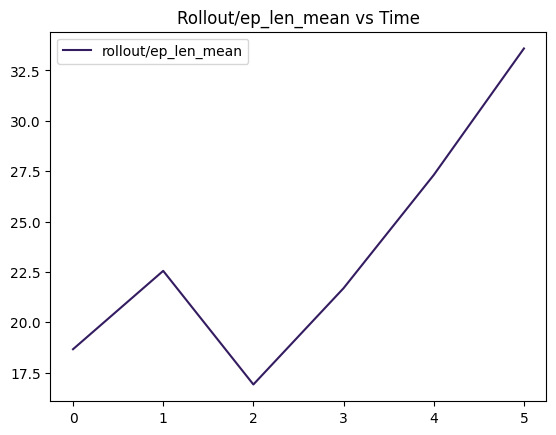

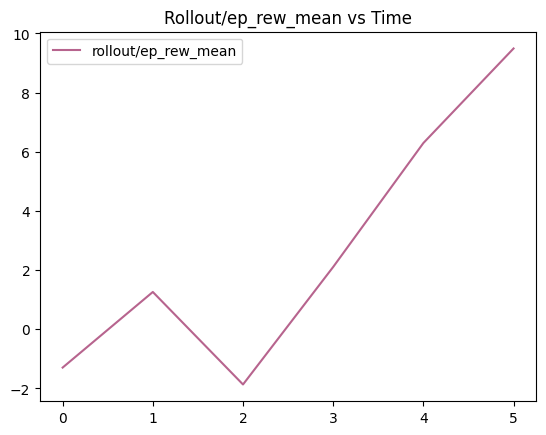

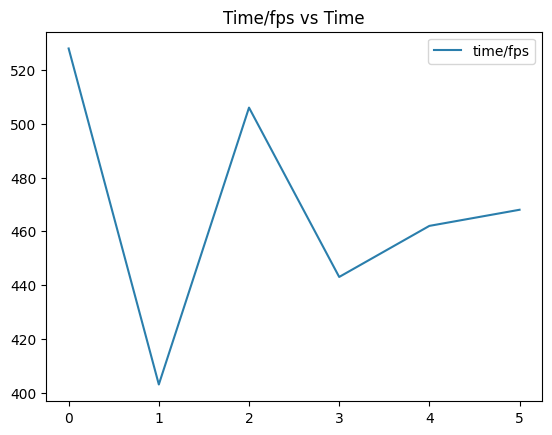

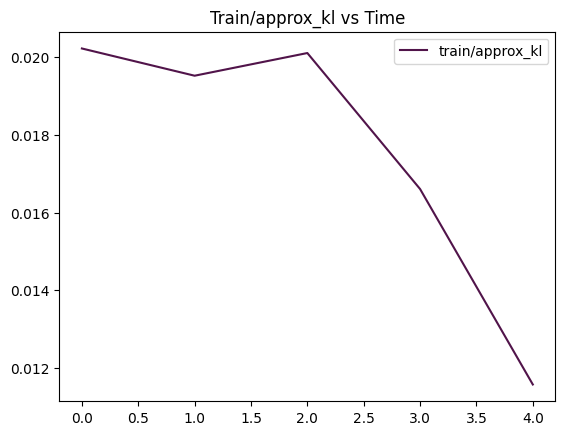

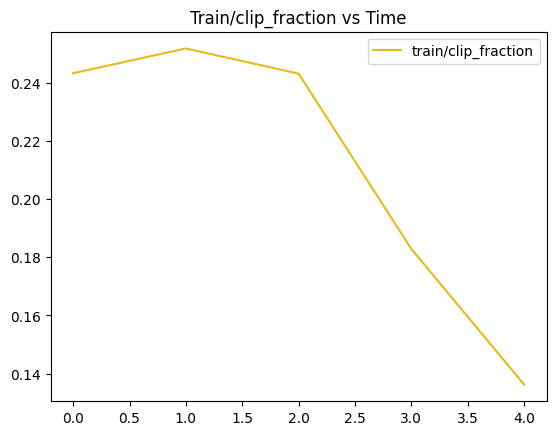

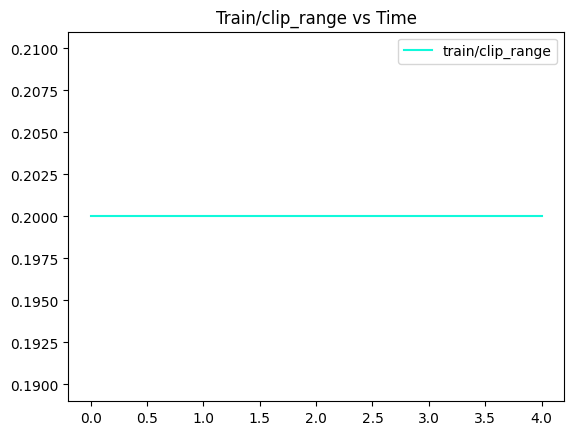

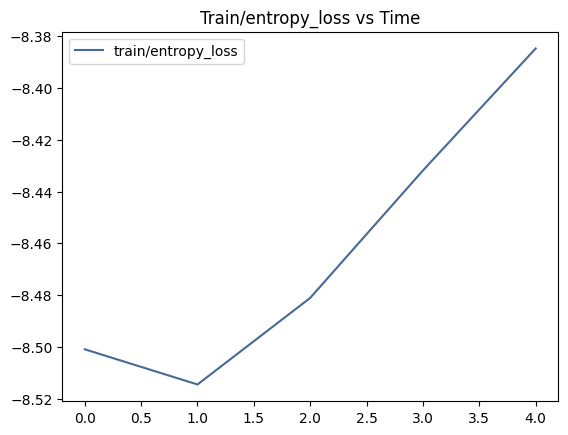

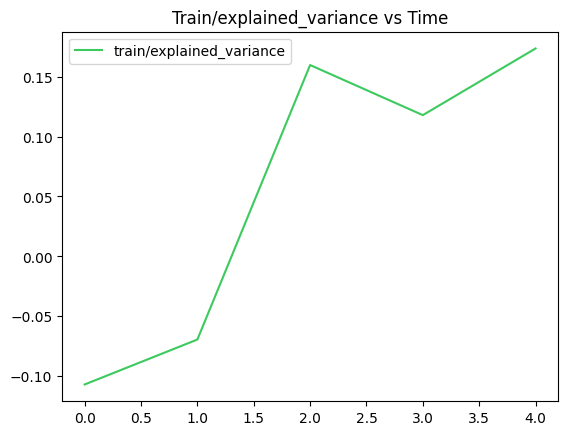

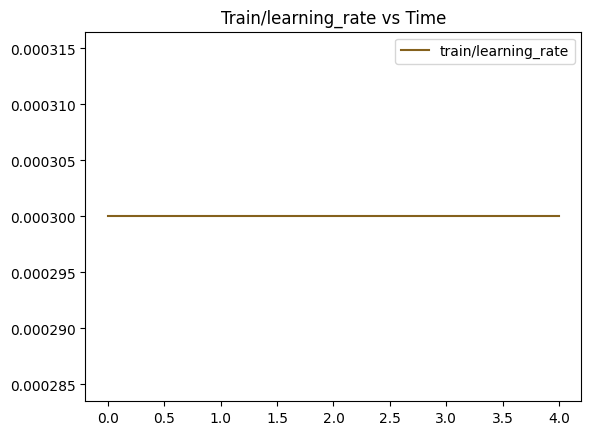

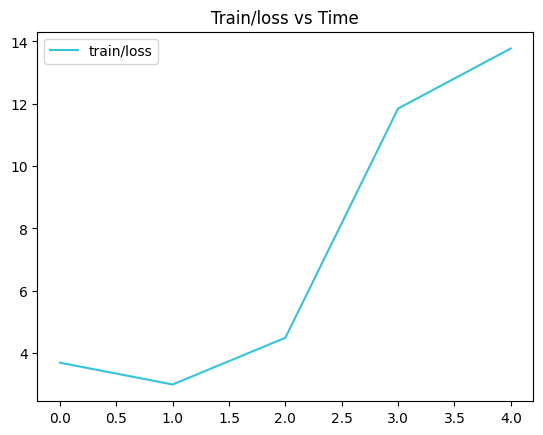

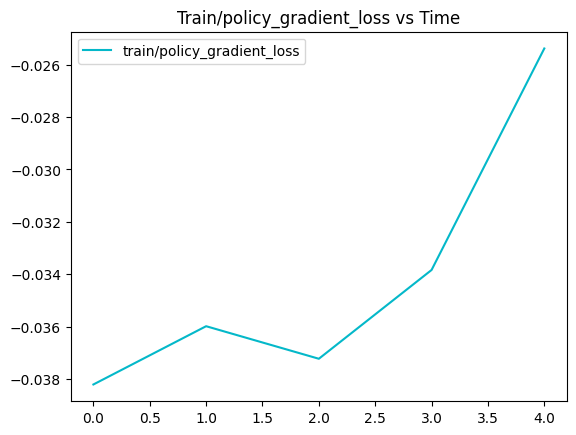

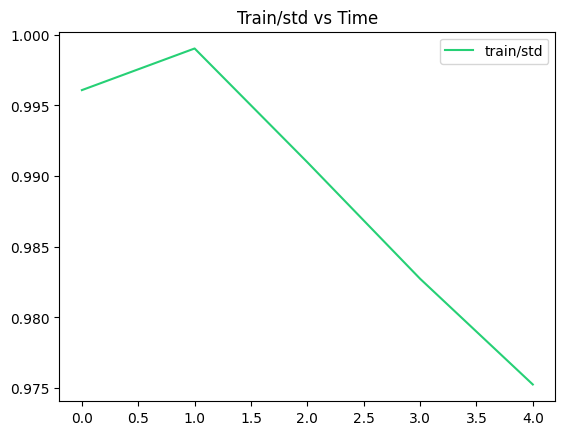

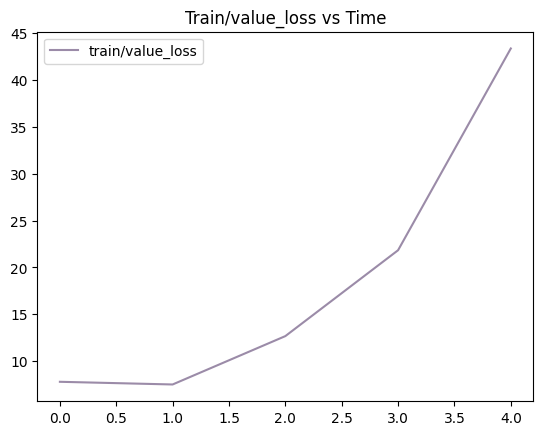

In [33]:
import random

colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(keys))]  # Generate random colors

for i, key in enumerate(keys):
    plt.title(f"{str(key).capitalize()} vs Time")
    plt.plot(data_final[key], label=f"{key}",color=colors[i])  # Assign a random color
    plt.legend()
    plt.show()

In [28]:
keys

['rollout/ep_len_mean',
 'rollout/ep_rew_mean',
 'time/fps',
 'train/approx_kl',
 'train/clip_fraction',
 'train/clip_range',
 'train/entropy_loss',
 'train/explained_variance',
 'train/learning_rate',
 'train/loss',
 'train/policy_gradient_loss',
 'train/std',
 'train/value_loss']

In [29]:
len(data_list)

2

In [30]:
chk_path="/home/hasib/semester7/reinforcement_learning/project/stats/walker-2d"